# K-means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1 id="random_generated_dataset">K-Means on a synthetic data set</h1>

In [2]:
np.random.seed(0)

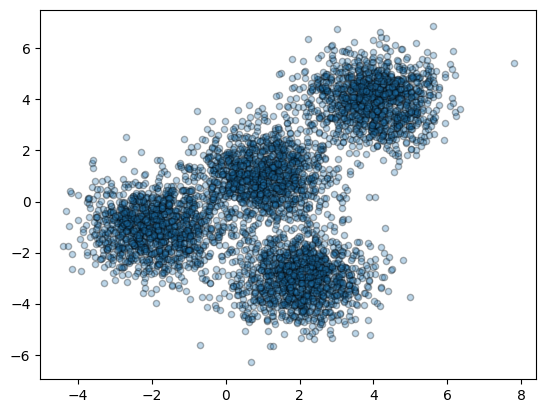

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's get the label for each point in the model using the `k_means.labels_` attribute and save them as `k_means_labels`.


In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 3, 2, 2], dtype=int32)

We will also get the coordinates of the cluster centers using `k_means.cluster_centers_` and save it as `k_means_cluster_centers`.


In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95489462, -1.03564706],
       [ 2.00811148, -3.01440138],
       [ 3.99211079,  3.99540917],
       [ 1.01557176,  1.03442098]])

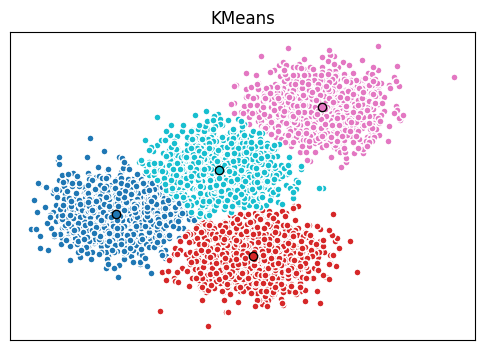

In [9]:

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)


for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):


    my_members = (k_means_labels == k)

    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [10]:

KMeans

sklearn.cluster._kmeans.KMeans

### k = 3.


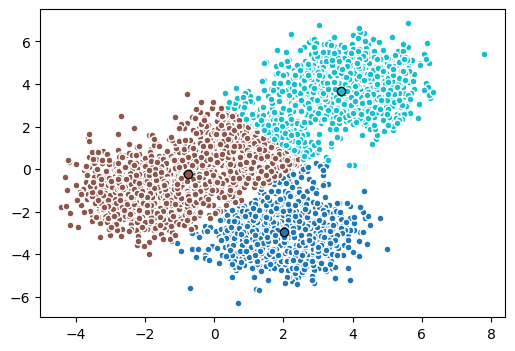

In [11]:
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


<h1 id="customer_segmentation_K_means">Customer Segmentation with k-means</h1>



In [ ]:
cust_df = pd.read_csv(r'D:\Unsupervised Algo\Dataset\Cust_Segmentation.csv')
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


<h2 id="pre_processing">Pre-processing</h2


As you can see, `Address` in this dataset is a categorical variable. The k-means algorithm doesn't work directly with categorical variables because the Euclidean distance function isn't meaningful for them. You could one-hot encode the categorical feature, but for illustration purposes let's run k-means clustering without it.


In [13]:
cust_df = cust_df.drop('Address', axis=1)

In [14]:
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [15]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

<h2 id="modeling">Modeling</h2>


In [17]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_


In [18]:
cust_df["Clus_km"] = labels

In [19]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


In [21]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


## cluster with similar demography

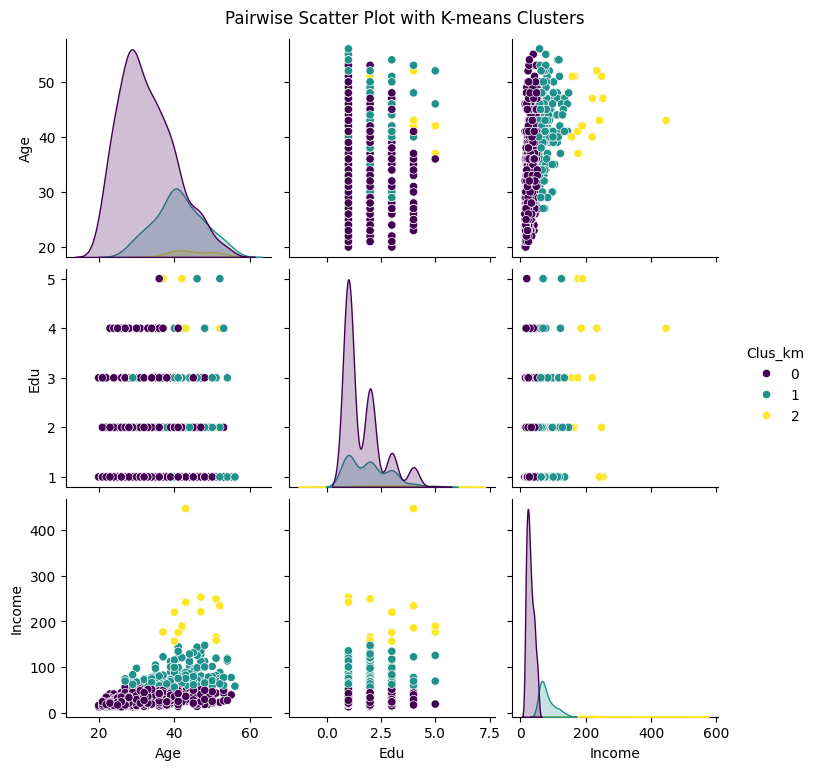

In [22]:
cust_df_sub = cust_df[['Age', 'Edu','Income','Clus_km']].copy()
sns.pairplot(cust_df_sub, hue='Clus_km', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)
plt.show()